In [1]:
## importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
!pip install scikit-learn
import sklearn.preprocessing as pre

Defaulting to user installation because normal site-packages is not writeable


In [2]:
Original_data= pd.read_excel(r"C:\Users\om\Desktop\New folder\NumPy\ecommerce_dataset.xlsx")

**making copy of original data **

In [3]:
data1= Original_data.copy()

In [4]:
data=pd.DataFrame(data=data1)

In [5]:
data

,OrderID,ProductPrice,Quantity,CustomerAge,ProductReviews,ProductRating,DiscountPercentage,CustomerTenure,ProductCategory,DeliveryType,PaymentMethod,CustomerLocation,ReturnStatus,BrowsingTime
0,1,839.68,1.0,44.184047,18.0,2.58,45.44,15.84,Clothing,Express,PayPal,Central,Yes,212.17
1,2,47.23,1.0,11.608463,11.0,4.41,47.51,7.92,Sports,Standard,Debit Card,Central,Yes,96.08
2,3,62.95,4.0,18.834189,26.0,4.02,13.46,30.24,Home,Express,Debit Card,North,No,115.24
3,4,80.46,1.0,40.147378,NaN,3.07,37.71,52.10,Clothing,Overnight,UPI,North,Yes,136.18
4,5,45.32,3.0,44.344160,19.0,3.29,11.94,0.01,Sports,Express,PayPal,Central,Yes,17.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,6,45.32,1.0,44.623125,19.0,1.52,36.88,27.94,Electronics,Standard,Credit Card,East,Yes,142.69
2006,7,81.58,2.0,23.194456,22.0,4.36,39.87,34.96,Clothing,Express,Credit Card,North,Yes,51.85
2007,8,65.35,5.0,20.326015,19.0,4.15,12.36,5.66,Sports,Standard,Credit Card,Central,No,124.08
2008,9,40.61,4.0,27.400477,20.0,3.63,35.79,16.14,Sports,Standard,PayPal,South,No,109.82


**Displaying basic information**

In [6]:
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())


   OrderID  ProductPrice  Quantity  CustomerAge  ProductReviews  \
0        1        839.68       1.0    44.184047            18.0   
1        2         47.23       1.0    11.608463            11.0   
2        3         62.95       4.0    18.834189            26.0   
3        4         80.46       1.0    40.147378             NaN   
4        5         45.32       3.0    44.344160            19.0   

   ProductRating  DiscountPercentage  CustomerTenure ProductCategory  \
0           2.58               45.44           15.84        Clothing   
1           4.41               47.51            7.92          Sports   
2           4.02               13.46           30.24            Home   
3           3.07               37.71           52.10        Clothing   
4           3.29               11.94            0.01          Sports   

  DeliveryType PaymentMethod CustomerLocation ReturnStatus  BrowsingTime  
0      Express        PayPal          Central          Yes        212.17  
1     Standard

** checking datatypes **


In [7]:
print(data.dtypes)

OrderID                 int64
ProductPrice          float64
Quantity              float64
CustomerAge           float64
ProductReviews        float64
ProductRating         float64
DiscountPercentage    float64
CustomerTenure        float64
ProductCategory        object
DeliveryType           object
PaymentMethod          object
CustomerLocation       object
ReturnStatus           object
BrowsingTime          float64
dtype: object


**Visualize distributions**


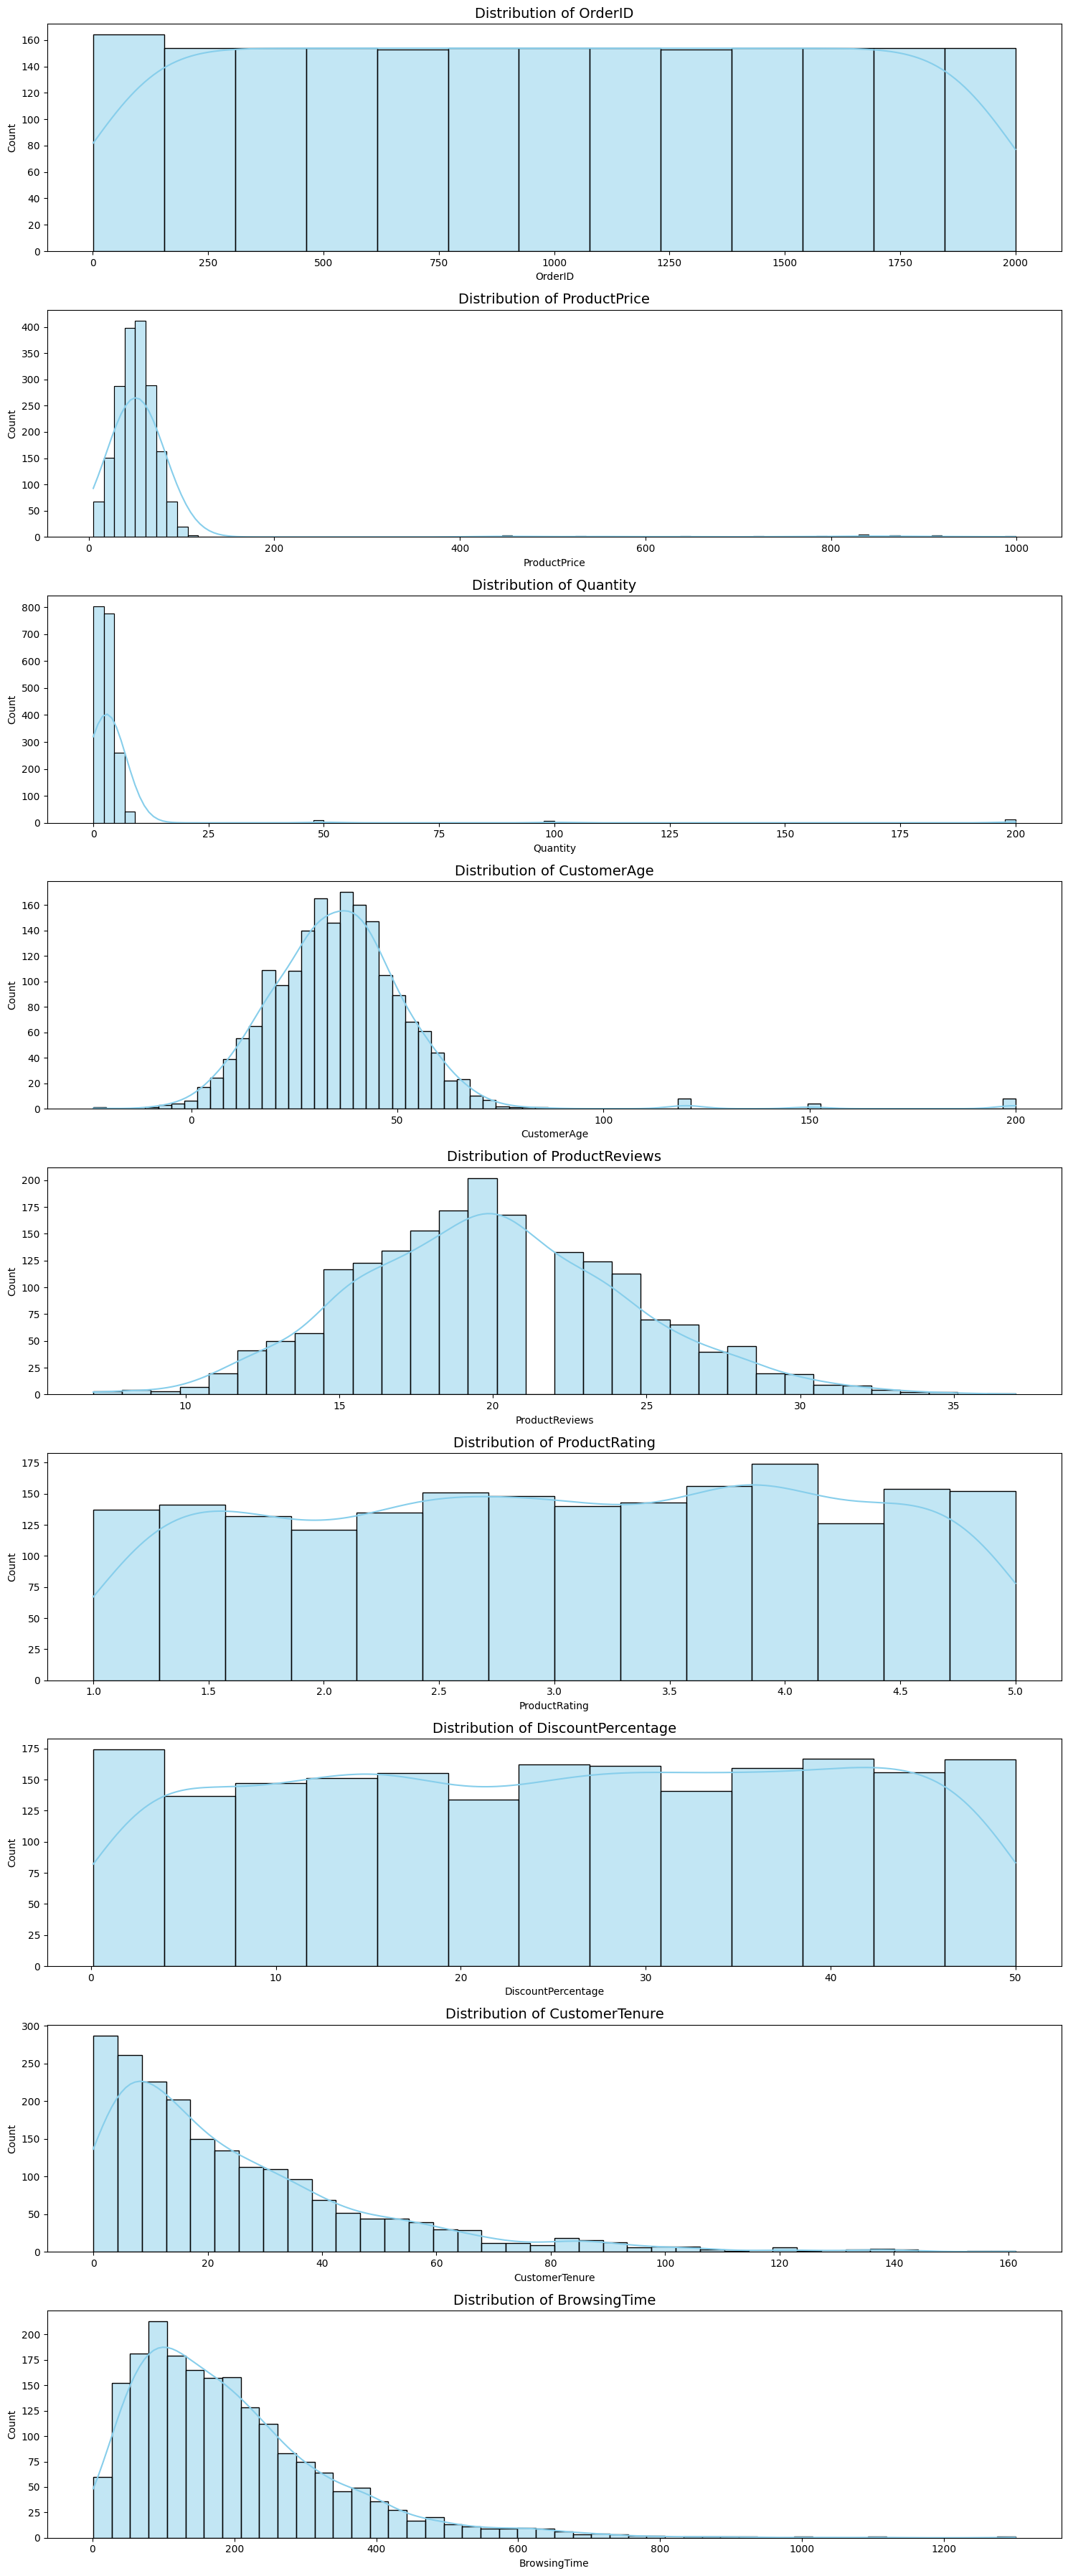

In [8]:
# Select only numeric columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Set figure size dynamically based on the number of numeric columns
plt.figure(figsize=(15, 4 * len(numerical_cols)))

## Loop through each numeric column and plot its histogram with KDE
for i, col_name in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.histplot(data=data, x=col_name, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col_name}', fontsize=14)
    plt.xlabel(col_name)
    plt.ylabel


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

 STEP 2
**checking the duplicates in data**
 


In [9]:
print(data.duplicated())    #shows True or False for if duplicatees are there
print(data.duplicated().sum())   #3 counts te no. of duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
2005     True
2006     True
2007     True
2008     True
2009     True
Length: 2010, dtype: bool
10


** dropping the duplicate values **

In [10]:
clean_data=data.drop_duplicates(inplace =True)
##we have dropped the duplicates here##
print(clean_data)

None


 STEP 3
 **finding the missing values and treating them **

In [11]:
##Checking the missing values 
print(data.isnull().sum())

OrderID                 0
ProductPrice           97
Quantity               99
CustomerAge            99
ProductReviews        100
ProductRating           0
DiscountPercentage      0
CustomerTenure          0
ProductCategory         0
DeliveryType            0
PaymentMethod           0
CustomerLocation        0
ReturnStatus            0
BrowsingTime            0
dtype: int64


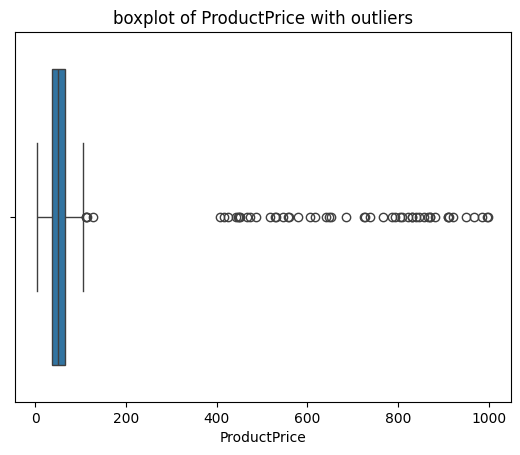

In [12]:
## checking the skewness for filling the data
sns.boxplot(x=data['ProductPrice'])
plt.title('boxplot of ProductPrice with outliers')
plt.show()

In [13]:
## as it is right skewed we are using median to fill the missing values in ProductPrice column.
median_product =data['ProductPrice'].median()
data.fillna({'ProductPrice': median_product}, inplace=True)


In [14]:
## cheking the boxplot after filling the missing values 
print(data.isnull().sum())

OrderID                 0
ProductPrice            0
Quantity               99
CustomerAge            99
ProductReviews        100
ProductRating           0
DiscountPercentage      0
CustomerTenure          0
ProductCategory         0
DeliveryType            0
PaymentMethod           0
CustomerLocation        0
ReturnStatus            0
BrowsingTime            0
dtype: int64


In [15]:
## treating the outliers in the Productprice column using capping method

In [16]:
Q1=data['ProductPrice'].quantile(0.25)
Q3=data['ProductPrice'].quantile(0.75) 
IQR =Q3-Q1
print(IQR)

lower_bound = Q1-1.5*IQR
upper_bound= Q3+1.5* IQR
print(lower_bound)
print(upper_bound)


##cap outliers 
data['ProductPrice']= np.where(data['ProductPrice']<lower_bound,lower_bound,data['ProductPrice'])
data['ProductPrice']= np.where(data['ProductPrice']>upper_bound,upper_bound,data['ProductPrice'])

25.667500000000004
0.20624999999999005
102.87625


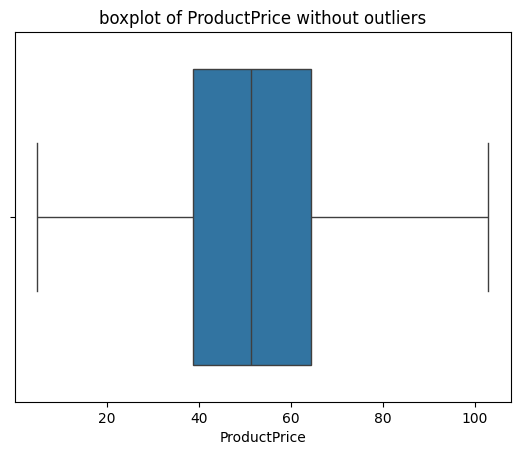

In [17]:
## checking the distribution after treating the outliers
sns.boxplot(x=data['ProductPrice'])
plt.title('boxplot of ProductPrice without outliers')
plt.show()

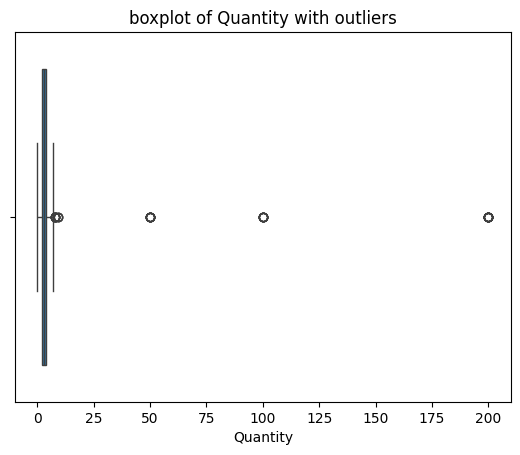

In [18]:
## checking the skewness for filling the data
sns.boxplot(x=data['Quantity'])
plt.title('boxplot of Quantity with outliers')
plt.show()

In [19]:
## as it is right skewed we are using median to fill the missing values in ProductPrice column.
median_quan =data['Quantity'].median()
data.fillna({'Quantity': median_quan}, inplace=True)

In [20]:
## cheking the boxplot after filling the missing values 
print(data.isnull().sum())

OrderID                 0
ProductPrice            0
Quantity                0
CustomerAge            99
ProductReviews        100
ProductRating           0
DiscountPercentage      0
CustomerTenure          0
ProductCategory         0
DeliveryType            0
PaymentMethod           0
CustomerLocation        0
ReturnStatus            0
BrowsingTime            0
dtype: int64


In [21]:
## treating the outliers in the Quantity column using capping method

In [22]:
Q1=data['Quantity'].quantile(0.25)
Q3=data['Quantity'].quantile(0.75) 
IQR =Q3-Q1
print(IQR)

lower_bound =0.0
upper_bound= Q3+1.5* IQR
print(lower_bound)
print(upper_bound)


##cap outliers 
data['Quantity']= np.where(data['Quantity']<lower_bound,lower_bound,data['Quantity'])
data['Quantity']= np.where(data['Quantity']>upper_bound,upper_bound,data['Quantity'])

2.0
0.0
7.0


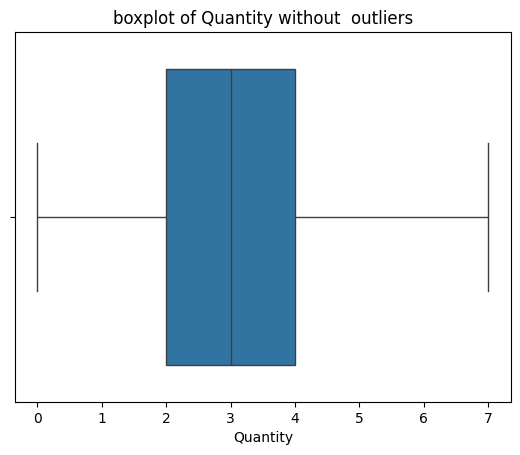

In [23]:
## checking the distribution after treating the outliers
sns.boxplot(x=data['Quantity'])
plt.title('boxplot of Quantity without  outliers')
plt.show()

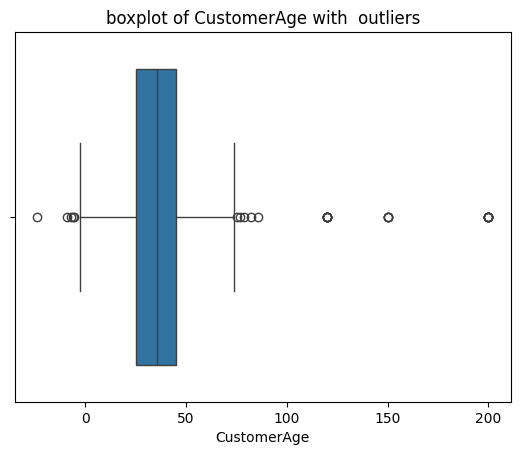

In [24]:
## checking the distribution after treating the outliers
sns.boxplot(x=data['CustomerAge'])
plt.title('boxplot of CustomerAge with  outliers')
plt.show()

In [25]:
## as it is right skewed we are using median to fill the missing values in ProductPrice column.
median_age =data['CustomerAge'].median()
data.fillna({'CustomerAge': median_age}, inplace=True)

In [26]:
## cheking the boxplot after filling the missing values 
print(data.isnull().sum())

OrderID                 0
ProductPrice            0
Quantity                0
CustomerAge             0
ProductReviews        100
ProductRating           0
DiscountPercentage      0
CustomerTenure          0
ProductCategory         0
DeliveryType            0
PaymentMethod           0
CustomerLocation        0
ReturnStatus            0
BrowsingTime            0
dtype: int64


In [27]:
## treating the outliers in the Quantity column using capping method ##

In [28]:
Q1=data['CustomerAge'].quantile(0.25)
Q3=data['CustomerAge'].quantile(0.75) 
IQR =Q3-Q1
print(IQR)

lower_bound =0.0
upper_bound= Q3+1.5* IQR
print(lower_bound)
print(upper_bound)


##cap outliers 
data['CustomerAge']= np.where(data['CustomerAge']<lower_bound,lower_bound,data['CustomerAge'])
data['CustomerAge']= np.where(data['CustomerAge']>upper_bound,upper_bound,data['CustomerAge'])

18.692945736388076
0.0
72.62266701316292


In [29]:
## converting age into interger data type
data['CustomerAge']= data['CustomerAge'].round(0).astype(int)

In [30]:
print(data)

      OrderID  ProductPrice  Quantity  CustomerAge  ProductReviews  \
0           1     102.87625       1.0           44            18.0   
1           2      47.23000       1.0           12            11.0   
2           3      62.95000       4.0           19            26.0   
3           4      80.46000       1.0           40             NaN   
4           5      45.32000       3.0           44            19.0   
...       ...           ...       ...          ...             ...   
1995     1996      71.40000       5.0           38            18.0   
1996     1997      49.47000       2.0           42            17.0   
1997     1998      32.36000       5.0           36            21.0   
1998     1999      46.74000       1.0           35            18.0   
1999     2000      35.10000       2.0           53            15.0   

      ProductRating  DiscountPercentage  CustomerTenure ProductCategory  \
0              2.58               45.44           15.84        Clothing   
1        

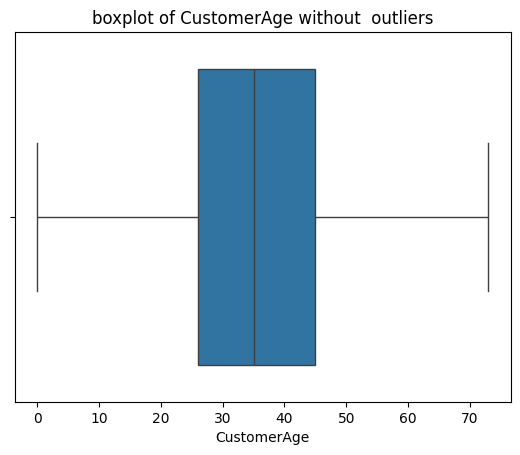

In [31]:
## checking the distribution after treating the outliers
sns.boxplot(x=data['CustomerAge'])
plt.title('boxplot of CustomerAge without  outliers')
plt.show()

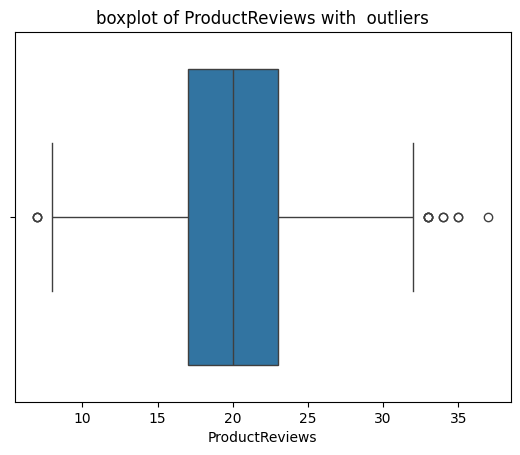

In [32]:
## checking the distribution after treating the outliers
sns.boxplot(x=data['ProductReviews'])
plt.title('boxplot of ProductReviews with  outliers')
plt.show()

In [33]:
## as it is right skewed we are using median to fill the missing values in ProductPrice column.
median_product =data['ProductReviews'].median()
data.fillna({'ProductReviews': median_product}, inplace=True)

In [34]:
## cheking the boxplot after filling the missing values 
print(data.isnull().sum())

OrderID               0
ProductPrice          0
Quantity              0
CustomerAge           0
ProductReviews        0
ProductRating         0
DiscountPercentage    0
CustomerTenure        0
ProductCategory       0
DeliveryType          0
PaymentMethod         0
CustomerLocation      0
ReturnStatus          0
BrowsingTime          0
dtype: int64


In [35]:
Q1=data['ProductReviews'].quantile(0.25)
Q3=data['ProductReviews'].quantile(0.75) 
IQR =Q3-Q1
print(IQR)

lower_bound = Q1-1.5*IQR
upper_bound= Q3+1.5* IQR
print(lower_bound)
print(upper_bound)


##cap outliers 
data['ProductReviews']= np.where(data['ProductReviews']<lower_bound,lower_bound,data['ProductReviews'])
data['ProductReviews']= np.where(data['ProductReviews']>upper_bound,upper_bound,data['ProductReviews'])

6.0
8.0
32.0


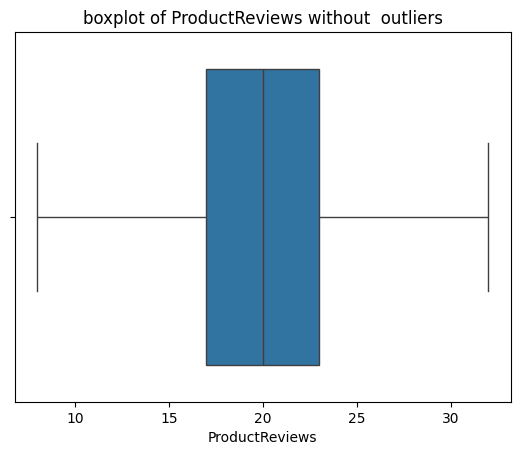

In [36]:
## checking the distribution after treating the outliers
sns.boxplot(x=data['ProductReviews'])
plt.title('boxplot of ProductReviews without  outliers')
plt.show()

**Removing extra spaces from DeliveryType column**

In [37]:
data['DeliveryType'] = data['DeliveryType'].str.strip()

**converting mixed case into title case of column ProductCategory**

In [38]:
data['ProductCategory'] = data['ProductCategory'].str.title()

In [39]:
print(data['DeliveryType'].unique())

['Express' 'Standard' 'Overnight' 'standard' 'EXPRESS']


In [40]:
data['DeliveryType']= data['DeliveryType'].str.title()

In [41]:
print(data['DeliveryType'].unique())

['Express' 'Standard' 'Overnight']


In [42]:
print(data.columns)

Index(['OrderID', 'ProductPrice', 'Quantity', 'CustomerAge', 'ProductReviews',
       'ProductRating', 'DiscountPercentage', 'CustomerTenure',
       'ProductCategory', 'DeliveryType', 'PaymentMethod', 'CustomerLocation',
       'ReturnStatus', 'BrowsingTime'],
      dtype='object')


In [43]:
 data['PaymentMethod'].str.title()


0            Paypal
1        Debit Card
2        Debit Card
3               Upi
4            Paypal
           ...     
1995     Debit Card
1996         Paypal
1997    Credit Card
1998            Upi
1999     Debit Card
Name: PaymentMethod, Length: 2000, dtype: object

In [44]:
print(data['PaymentMethod'].unique())

['PayPal' 'Debit Card' 'UPI' 'Credit Card']


**Converting Skewed to Normal dirtibuiton**

In [45]:
skew1=data['CustomerTenure'].skew()
print(skew1)

1.7849991498795355


**we have used log transformation**

In [46]:
data['CustomerTenure']=np.log1p(data['CustomerTenure'])

In [47]:
skew2=data['CustomerTenure'].skew()
print(skew2)

-0.45465701252384527


**skewness is in between -0.5 to 0.5,so its normal distribution now**

In [48]:
data['ProductReviews'].skew()


np.float64(0.2047011487568364)

**its a noraml distribution**

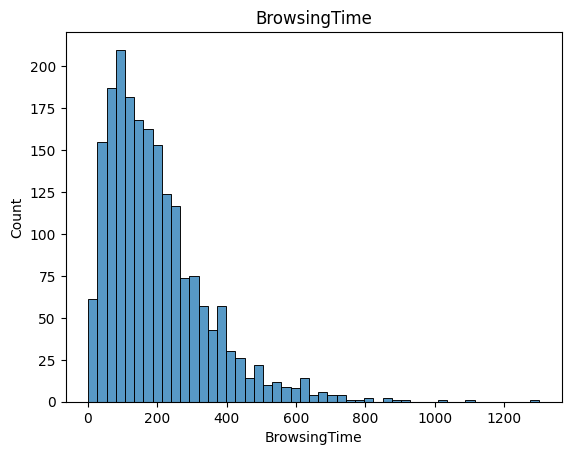

In [49]:
##checking the distribution of BrowsingTIme column
sns.histplot(x=data['BrowsingTime'])
plt.title('BrowsingTime')
plt.show()

In [50]:
data['BrowsingTime'].skew()


np.float64(1.678529302048084)

**We have used Cuberoot tranformation to convert it into normal distribution**

In [51]:
data['BrowsingTime']=np.cbrt(data['BrowsingTime'])

In [52]:
data['BrowsingTime'].skew()

np.float64(0.1536991095085565)

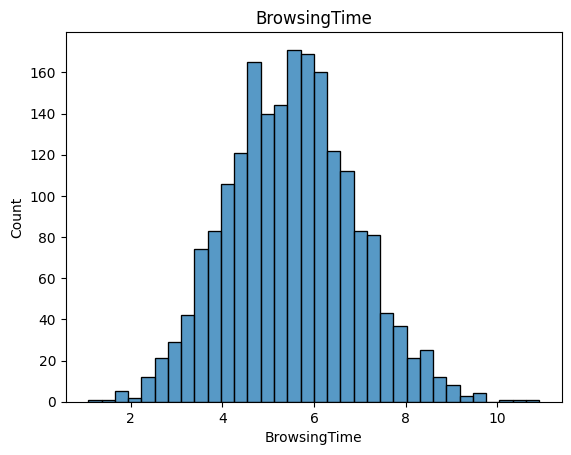

In [53]:
##checking the distribution of BrowsingTIme column after treating the outliers
sns.histplot(x=data['BrowsingTime'])
plt.title('BrowsingTime')
plt.show()

**BINNING**


## creating binning of CustomerAge column 

In [54]:
##creating bins and labels
bins=(0,18,30,50,75)
labels=['Teen','Young','Adult','Senior']

# 'right=True' means the bins are inclusive of the right-most edge (e.g., 0 < age <= 18)
# 'include_lowest=True' ensures the first bin includes its lower bound (e.g., age = 0)
data['Age_Group'] = pd.cut(
    data['CustomerAge'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True 
)


In [55]:
print(data)

      OrderID  ProductPrice  Quantity  CustomerAge  ProductReviews  \
0           1     102.87625       1.0           44            18.0   
1           2      47.23000       1.0           12            11.0   
2           3      62.95000       4.0           19            26.0   
3           4      80.46000       1.0           40            20.0   
4           5      45.32000       3.0           44            19.0   
...       ...           ...       ...          ...             ...   
1995     1996      71.40000       5.0           38            18.0   
1996     1997      49.47000       2.0           42            17.0   
1997     1998      32.36000       5.0           36            21.0   
1998     1999      46.74000       1.0           35            18.0   
1999     2000      35.10000       2.0           53            15.0   

      ProductRating  DiscountPercentage  CustomerTenure ProductCategory  \
0              2.58               45.44        2.823757        Clothing   
1        

In [56]:
## Creating segmets on ProductPrice

In [57]:
print(data)

      OrderID  ProductPrice  Quantity  CustomerAge  ProductReviews  \
0           1     102.87625       1.0           44            18.0   
1           2      47.23000       1.0           12            11.0   
2           3      62.95000       4.0           19            26.0   
3           4      80.46000       1.0           40            20.0   
4           5      45.32000       3.0           44            19.0   
...       ...           ...       ...          ...             ...   
1995     1996      71.40000       5.0           38            18.0   
1996     1997      49.47000       2.0           42            17.0   
1997     1998      32.36000       5.0           36            21.0   
1998     1999      46.74000       1.0           35            18.0   
1999     2000      35.10000       2.0           53            15.0   

      ProductRating  DiscountPercentage  CustomerTenure ProductCategory  \
0              2.58               45.44        2.823757        Clothing   
1        

In [58]:
bins=(5,25,45,65,85,105)
labels=['Low','Medium','Mid-high','High','Premium']

data['Price_segments'] = pd.cut(
    data['ProductPrice'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True 
)

In [59]:
print(data)

      OrderID  ProductPrice  Quantity  CustomerAge  ProductReviews  \
0           1     102.87625       1.0           44            18.0   
1           2      47.23000       1.0           12            11.0   
2           3      62.95000       4.0           19            26.0   
3           4      80.46000       1.0           40            20.0   
4           5      45.32000       3.0           44            19.0   
...       ...           ...       ...          ...             ...   
1995     1996      71.40000       5.0           38            18.0   
1996     1997      49.47000       2.0           42            17.0   
1997     1998      32.36000       5.0           36            21.0   
1998     1999      46.74000       1.0           35            18.0   
1999     2000      35.10000       2.0           53            15.0   

      ProductRating  DiscountPercentage  CustomerTenure ProductCategory  \
0              2.58               45.44        2.823757        Clothing   
1        

In [60]:
##creating segmenst of cutomer tenure as  Cust_segments

In [61]:
bins=(0,1,2,np.inf)
labels=['New Customer','Regular','Loyal']

data['Cust_segments'] = pd.cut(
    data['CustomerTenure'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True 
)

In [62]:
print(data)

      OrderID  ProductPrice  Quantity  CustomerAge  ProductReviews  \
0           1     102.87625       1.0           44            18.0   
1           2      47.23000       1.0           12            11.0   
2           3      62.95000       4.0           19            26.0   
3           4      80.46000       1.0           40            20.0   
4           5      45.32000       3.0           44            19.0   
...       ...           ...       ...          ...             ...   
1995     1996      71.40000       5.0           38            18.0   
1996     1997      49.47000       2.0           42            17.0   
1997     1998      32.36000       5.0           36            21.0   
1998     1999      46.74000       1.0           35            18.0   
1999     2000      35.10000       2.0           53            15.0   

      ProductRating  DiscountPercentage  CustomerTenure ProductCategory  \
0              2.58               45.44        2.823757        Clothing   
1        

In [63]:
print(data.isnull().sum())

OrderID               0
ProductPrice          0
Quantity              0
CustomerAge           0
ProductReviews        0
ProductRating         0
DiscountPercentage    0
CustomerTenure        0
ProductCategory       0
DeliveryType          0
PaymentMethod         0
CustomerLocation      0
ReturnStatus          0
BrowsingTime          0
Age_Group             0
Price_segments        0
Cust_segments         0
dtype: int64


**Analyze distributions**
##Age_Group

##Price_segments  

##Cust_segments



Age_Group
Adult     49.80
Young     22.85
Senior    14.55
Teen      12.80
Name: proportion, dtype: float64


(array([996.,   0.,   0., 256.,   0.,   0., 457.,   0.,   0., 291.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

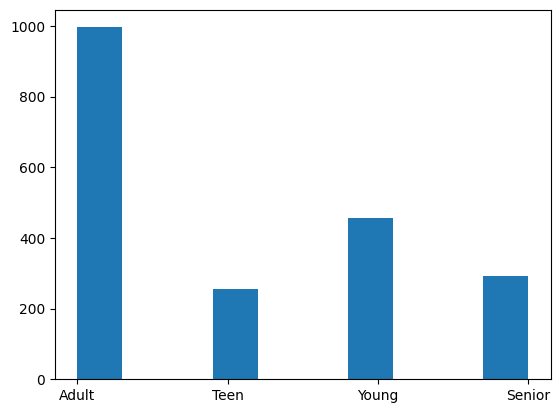

In [64]:
data.Age_Group.value_counts()
print((data.Age_Group.value_counts(normalize=True)*100).round(2))
plt.hist(data.Age_Group)

Price_segments
Mid-high    40.6
Medium      26.3
High        17.5
Low          8.8
Premium      6.8
Name: proportion, dtype: float64


(array([136.,   0., 812.,   0.,   0., 350.,   0., 526.,   0., 176.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

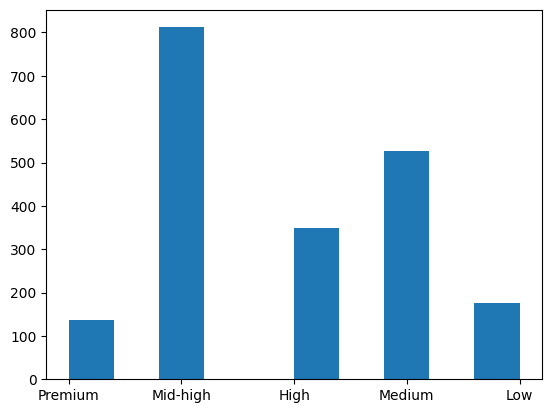

In [65]:
data.Price_segments .value_counts()
print((data.Price_segments .value_counts(normalize=True)*100).round(2))
plt.hist(data.Price_segments )

Cust_segments
Loyal           79.15
Regular         15.10
New Customer     5.75
Name: proportion, dtype: float64


(array([1583.,    0.,    0.,    0.,    0.,  115.,    0.,    0.,    0.,
         302.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

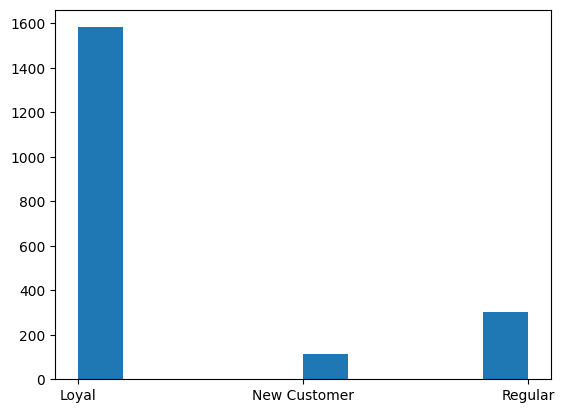

In [66]:
data.Cust_segments .value_counts()
print((data.Cust_segments .value_counts(normalize=True)*100).round(2))
plt.hist(data.Cust_segments )

**ENCODE CATEGORICAL VARIABLES**

In [67]:
##one-hot encoding on  
one_hot_cols=['DeliveryType','PaymentMethod','CustomerLocation','ReturnStatus']
del_onehot_encoding=pd.get_dummies(data,columns=one_hot_cols,dtype=int)

In [68]:
data =del_onehot_encoding 

In [69]:
data

,OrderID,ProductPrice,Quantity,CustomerAge,ProductReviews,ProductRating,DiscountPercentage,CustomerTenure,ProductCategory,BrowsingTime,...,PaymentMethod_Debit Card,PaymentMethod_PayPal,PaymentMethod_UPI,CustomerLocation_Central,CustomerLocation_East,CustomerLocation_North,CustomerLocation_South,CustomerLocation_West,ReturnStatus_No,ReturnStatus_Yes
0,1,102.87625,1.0,44,18.0,2.58,45.44,2.823757,Clothing,5.964325,...,0,1,0,1,0,0,0,0,0,1
1,2,47.23000,1.0,12,11.0,4.41,47.51,2.188296,Sports,4.580129,...,1,0,0,1,0,0,0,0,0,1
2,3,62.95000,4.0,19,26.0,4.02,13.46,3.441699,Home,4.866325,...,1,0,0,0,0,1,0,0,1,0
3,4,80.46000,1.0,40,20.0,3.07,37.71,3.972177,Clothing,5.144831,...,0,0,1,0,0,1,0,0,0,1
4,5,45.32000,3.0,44,19.0,3.29,11.94,0.009950,Sports,2.578822,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71.40000,5.0,38,18.0,3.93,3.77,3.989169,Electronics,8.584758,...,1,0,0,0,0,0,0,1,0,1
1996,1997,49.47000,2.0,42,17.0,1.25,35.95,2.924773,Sports,7.377996,...,0,1,0,0,0,0,1,0,0,1
1997,1998,32.36000,5.0,36,21.0,3.37,14.59,2.420368,Clothing,6.817530,...,0,0,0,1,0,0,0,0,0,1
1998,1999,46.74000,1.0,35,18.0,4.81,2.44,2.081938,Electronics,5.592912,...,0,0,1,0,1,0,0,0,1,0


In [70]:
data

,OrderID,ProductPrice,Quantity,CustomerAge,ProductReviews,ProductRating,DiscountPercentage,CustomerTenure,ProductCategory,BrowsingTime,...,PaymentMethod_Debit Card,PaymentMethod_PayPal,PaymentMethod_UPI,CustomerLocation_Central,CustomerLocation_East,CustomerLocation_North,CustomerLocation_South,CustomerLocation_West,ReturnStatus_No,ReturnStatus_Yes
0,1,102.87625,1.0,44,18.0,2.58,45.44,2.823757,Clothing,5.964325,...,0,1,0,1,0,0,0,0,0,1
1,2,47.23000,1.0,12,11.0,4.41,47.51,2.188296,Sports,4.580129,...,1,0,0,1,0,0,0,0,0,1
2,3,62.95000,4.0,19,26.0,4.02,13.46,3.441699,Home,4.866325,...,1,0,0,0,0,1,0,0,1,0
3,4,80.46000,1.0,40,20.0,3.07,37.71,3.972177,Clothing,5.144831,...,0,0,1,0,0,1,0,0,0,1
4,5,45.32000,3.0,44,19.0,3.29,11.94,0.009950,Sports,2.578822,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71.40000,5.0,38,18.0,3.93,3.77,3.989169,Electronics,8.584758,...,1,0,0,0,0,0,0,1,0,1
1996,1997,49.47000,2.0,42,17.0,1.25,35.95,2.924773,Sports,7.377996,...,0,1,0,0,0,0,1,0,0,1
1997,1998,32.36000,5.0,36,21.0,3.37,14.59,2.420368,Clothing,6.817530,...,0,0,0,1,0,0,0,0,0,1
1998,1999,46.74000,1.0,35,18.0,4.81,2.44,2.081938,Electronics,5.592912,...,0,0,1,0,1,0,0,0,1,0


**labelencoding**



In [71]:
from sklearn.preprocessing import LabelEncoder


In [72]:
##label encoding for Age_Group, Price_segments , Cust_segments
le= LabelEncoder()
data['Age_grp_skl']=le.fit_transform(data['Age_Group'])
data['Price_seg_skl']=le.fit_transform(data['Price_segments'])
data['Cust_seg_skl']=le.fit_transform(data['Cust_segments'])
print(data)

      OrderID  ProductPrice  Quantity  CustomerAge  ProductReviews  \
0           1     102.87625       1.0           44            18.0   
1           2      47.23000       1.0           12            11.0   
2           3      62.95000       4.0           19            26.0   
3           4      80.46000       1.0           40            20.0   
4           5      45.32000       3.0           44            19.0   
...       ...           ...       ...          ...             ...   
1995     1996      71.40000       5.0           38            18.0   
1996     1997      49.47000       2.0           42            17.0   
1997     1998      32.36000       5.0           36            21.0   
1998     1999      46.74000       1.0           35            18.0   
1999     2000      35.10000       2.0           53            15.0   

      ProductRating  DiscountPercentage  CustomerTenure ProductCategory  \
0              2.58               45.44        2.823757        Clothing   
1        

**step 9 feature engineering**


##Create derived feature##

In [73]:
data['Total_spend'] = data['ProductPrice']*data['Quantity']

In [74]:
data['Tenure_in_years'] = data['CustomerTenure']/12

In [75]:
data

,OrderID,ProductPrice,Quantity,CustomerAge,ProductReviews,ProductRating,DiscountPercentage,CustomerTenure,ProductCategory,BrowsingTime,...,CustomerLocation_North,CustomerLocation_South,CustomerLocation_West,ReturnStatus_No,ReturnStatus_Yes,Age_grp_skl,Price_seg_skl,Cust_seg_skl,Total_spend,Tenure_in_years
0,1,102.87625,1.0,44,18.0,2.58,45.44,2.823757,Clothing,5.964325,...,0,0,0,0,1,0,4,0,102.87625,0.235313
1,2,47.23000,1.0,12,11.0,4.41,47.51,2.188296,Sports,4.580129,...,0,0,0,0,1,2,3,0,47.23000,0.182358
2,3,62.95000,4.0,19,26.0,4.02,13.46,3.441699,Home,4.866325,...,1,0,0,1,0,3,3,0,251.80000,0.286808
3,4,80.46000,1.0,40,20.0,3.07,37.71,3.972177,Clothing,5.144831,...,1,0,0,0,1,0,0,0,80.46000,0.331015
4,5,45.32000,3.0,44,19.0,3.29,11.94,0.009950,Sports,2.578822,...,0,0,0,0,1,0,3,1,135.96000,0.000829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71.40000,5.0,38,18.0,3.93,3.77,3.989169,Electronics,8.584758,...,0,0,1,0,1,0,0,0,357.00000,0.332431
1996,1997,49.47000,2.0,42,17.0,1.25,35.95,2.924773,Sports,7.377996,...,0,1,0,0,1,0,3,0,98.94000,0.243731
1997,1998,32.36000,5.0,36,21.0,3.37,14.59,2.420368,Clothing,6.817530,...,0,0,0,0,1,0,2,0,161.80000,0.201697
1998,1999,46.74000,1.0,35,18.0,4.81,2.44,2.081938,Electronics,5.592912,...,0,0,0,1,0,0,3,0,46.74000,0.173495


##create interaction feature##

In [76]:
data['price_rating_intraction']= data['ProductPrice']*data['ProductRating']

In [77]:
data

,OrderID,ProductPrice,Quantity,CustomerAge,ProductReviews,ProductRating,DiscountPercentage,CustomerTenure,ProductCategory,BrowsingTime,...,CustomerLocation_South,CustomerLocation_West,ReturnStatus_No,ReturnStatus_Yes,Age_grp_skl,Price_seg_skl,Cust_seg_skl,Total_spend,Tenure_in_years,price_rating_intraction
0,1,102.87625,1.0,44,18.0,2.58,45.44,2.823757,Clothing,5.964325,...,0,0,0,1,0,4,0,102.87625,0.235313,265.420725
1,2,47.23000,1.0,12,11.0,4.41,47.51,2.188296,Sports,4.580129,...,0,0,0,1,2,3,0,47.23000,0.182358,208.284300
2,3,62.95000,4.0,19,26.0,4.02,13.46,3.441699,Home,4.866325,...,0,0,1,0,3,3,0,251.80000,0.286808,253.059000
3,4,80.46000,1.0,40,20.0,3.07,37.71,3.972177,Clothing,5.144831,...,0,0,0,1,0,0,0,80.46000,0.331015,247.012200
4,5,45.32000,3.0,44,19.0,3.29,11.94,0.009950,Sports,2.578822,...,0,0,0,1,0,3,1,135.96000,0.000829,149.102800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71.40000,5.0,38,18.0,3.93,3.77,3.989169,Electronics,8.584758,...,0,1,0,1,0,0,0,357.00000,0.332431,280.602000
1996,1997,49.47000,2.0,42,17.0,1.25,35.95,2.924773,Sports,7.377996,...,1,0,0,1,0,3,0,98.94000,0.243731,61.837500
1997,1998,32.36000,5.0,36,21.0,3.37,14.59,2.420368,Clothing,6.817530,...,0,0,0,1,0,2,0,161.80000,0.201697,109.053200
1998,1999,46.74000,1.0,35,18.0,4.81,2.44,2.081938,Electronics,5.592912,...,0,0,1,0,0,3,0,46.74000,0.173495,224.819400


##creating indicators##

In [78]:
data['high_value_order']=(data['Total_spend']>700).astype(int)

In [79]:
data['high_rating']= (data['ProductRating']>=4.5).astype(int)

In [80]:
data

,OrderID,ProductPrice,Quantity,CustomerAge,ProductReviews,ProductRating,DiscountPercentage,CustomerTenure,ProductCategory,BrowsingTime,...,ReturnStatus_No,ReturnStatus_Yes,Age_grp_skl,Price_seg_skl,Cust_seg_skl,Total_spend,Tenure_in_years,price_rating_intraction,high_value_order,high_rating
0,1,102.87625,1.0,44,18.0,2.58,45.44,2.823757,Clothing,5.964325,...,0,1,0,4,0,102.87625,0.235313,265.420725,0,0
1,2,47.23000,1.0,12,11.0,4.41,47.51,2.188296,Sports,4.580129,...,0,1,2,3,0,47.23000,0.182358,208.284300,0,0
2,3,62.95000,4.0,19,26.0,4.02,13.46,3.441699,Home,4.866325,...,1,0,3,3,0,251.80000,0.286808,253.059000,0,0
3,4,80.46000,1.0,40,20.0,3.07,37.71,3.972177,Clothing,5.144831,...,0,1,0,0,0,80.46000,0.331015,247.012200,0,0
4,5,45.32000,3.0,44,19.0,3.29,11.94,0.009950,Sports,2.578822,...,0,1,0,3,1,135.96000,0.000829,149.102800,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71.40000,5.0,38,18.0,3.93,3.77,3.989169,Electronics,8.584758,...,0,1,0,0,0,357.00000,0.332431,280.602000,0,0
1996,1997,49.47000,2.0,42,17.0,1.25,35.95,2.924773,Sports,7.377996,...,0,1,0,3,0,98.94000,0.243731,61.837500,0,0
1997,1998,32.36000,5.0,36,21.0,3.37,14.59,2.420368,Clothing,6.817530,...,0,1,0,2,0,161.80000,0.201697,109.053200,0,0
1998,1999,46.74000,1.0,35,18.0,4.81,2.44,2.081938,Electronics,5.592912,...,1,0,0,3,0,46.74000,0.173495,224.819400,0,1


**SAVE AND VALIDATE**

In [81]:
print(data.isnull().sum())

OrderID                      0
ProductPrice                 0
Quantity                     0
CustomerAge                  0
ProductReviews               0
ProductRating                0
DiscountPercentage           0
CustomerTenure               0
ProductCategory              0
BrowsingTime                 0
Age_Group                    0
Price_segments               0
Cust_segments                0
DeliveryType_Express         0
DeliveryType_Overnight       0
DeliveryType_Standard        0
PaymentMethod_Credit Card    0
PaymentMethod_Debit Card     0
PaymentMethod_PayPal         0
PaymentMethod_UPI            0
CustomerLocation_Central     0
CustomerLocation_East        0
CustomerLocation_North       0
CustomerLocation_South       0
CustomerLocation_West        0
ReturnStatus_No              0
ReturnStatus_Yes             0
Age_grp_skl                  0
Price_seg_skl                0
Cust_seg_skl                 0
Total_spend                  0
Tenure_in_years              0
price_ra

In [82]:
# Generate summary report
summary = pd.DataFrame({
    'Feature': data.columns,
    'DataType': [str(data[col].dtypes) for col in data.columns],
    'UniqueValues': [data[col].nunique() for col in data.columns],
    'MissingValues': [data[col].isnull().sum() for col in data.columns],
    'Min': [data[col].min() if pd.api.types.is_numeric_dtype(data[col]) else None for col in data.columns],
    'Max': [data[col].max() if pd.api.types.is_numeric_dtype(data[col]) else None for col in data.columns],
    'Mean': [data[col].mean() if pd.api.types.is_numeric_dtype(data[col]) else None for col in data.columns]
})

# Display first 10 features summary
print(summary.head(10))

              Feature DataType  UniqueValues  MissingValues       Min  \
0             OrderID    int64          2000              0  1.000000   
1        ProductPrice  float64          1596              0  5.000000   
2            Quantity  float64             8              0  0.000000   
3         CustomerAge    int64            74              0  0.000000   
4      ProductReviews  float64            25              0  8.000000   
5       ProductRating  float64           401              0  1.000000   
6  DiscountPercentage  float64          1670              0  0.120000   
7      CustomerTenure  float64          1683              0  0.000000   
8     ProductCategory   object             5              0       NaN   
9        BrowsingTime  float64          1957              0  1.074337   

           Max         Mean  
0  2000.000000  1000.500000  
1   102.876250    52.298525  
2     7.000000     2.989000  
3    73.000000    35.426000  
4    32.000000    19.985500  
5     5.000000  

In [83]:
x=data.to_excel('Gajendra_dataset.xlsx',index=False)
print(x)

None


In [84]:
import os 
print(os.getcwd())

C:\Users\om
